# CS229: Problem Set 2
## Problem 6: Spam Classification


**C. Combier**

This iPython Notebook provides solutions to Stanford's CS229 (Machine Learning, Fall 2017) graduate course problem set 5, taught by Andrew Ng.

The problem set can be found here: [./ps2.pdf](ps2.pdf)

I chose to write the solutions to the coding questions in Python, whereas the Stanford class is taught with Matlab/Octave.

## Notation

- $x^i$ is the $i^{th}$ feature vector
- $y^i$ is the expected outcome for the $i^{th}$ training example
- $m$ is the number of training examples
- $n$ is the number of features

In [1]:
%matplotlib inline
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
def readMatrix(file):
    fd = open(file, 'r')
    hdr = fd.readline()
    rows, cols = [int(s) for s in fd.readline().strip().split()]
    tokens = fd.readline().strip().split()
    matrix = np.zeros((rows, cols))
    Y = []
    for i, line in enumerate(fd):
        nums = [int(x) for x in line.strip().split()]
        Y.append(nums[0])
        kv = np.array(nums[1:])
        k = np.cumsum(kv[:-1:2])
        v = kv[1::2]
        matrix[i, k] = v
    return matrix, tokens, np.array(Y)



def evaluate(output, label):
    error = (output != label).sum() * 1. / len(output)
    print 'Error: %1.4f' % error
    return error

def main():
    trainMatrix, tokenlist, trainCategory = readMatrix('./data/MATRIX.TRAIN')
    testMatrix, tokenlist, testCategory = readMatrix('./data/MATRIX.TEST')

    state = nb_train(trainMatrix, trainCategory)
    output = nb_test(testMatrix, state)

    evaluate(output, testCategory)
    return

In [3]:
trainMatrix, tokenlist, trainCategory = readMatrix('./data/MATRIX.TRAIN')
testMatrix, tokenlist, testCategory = readMatrix('./data/MATRIX.TEST')

In [4]:
def nb_train(matrix, category):
    state = {}
    N = matrix.shape[1]
    ###################
    
    spam = matrix[category == 1, :]
    nospam = matrix[category == 0, :]

    spam_lengths = spam.sum(axis = 1)
    nospam_lengths = spam.sum(axis = 1)

    state['phi_spam'] = (spam.sum(axis = 0) + 1) / (np.sum(spam_lengths) + N)
    state['phi_nospam'] = (nospam.sum(axis = 0) + 1) / (np.sum(nospam_lengths) + N)
    state['phi'] = spam.shape[0]/(spam.shape[0]+nospam.shape[0])
    ###################
    return state

In [5]:
def nb_test(matrix, state):
    output = np.zeros(matrix.shape[0])
    ###################
    log_phi_spam = np.sum( np.log(state['phi_spam'])*matrix, axis = 1)
    log_phi_nospam = np.sum( np.log(state['phi_nospam'])*matrix, axis = 1)
    phi = state['phi']
    
    ratio = np.exp(log_phi_nospam + np.log(1 - phi) - log_phi_spam - np.log(phi))
    probs = 1 / (1 + ratio)
    
    output[probs > 0.5] = 1
    
    ###################
    return output

In [6]:
trainMatrix, tokenlist, trainCategory = readMatrix('./data/MATRIX.TRAIN')

In [7]:
tokenlist = np.array(tokenlist)
state = nb_train(trainMatrix, trainCategory)

In [8]:
likely_spam_tokens = np.argsort(state['phi_spam']/state['phi_nospam'])[-5:]

In [9]:
likely_spam_tokens

array([1368,  393, 1356, 1209,  615])

In [10]:
tokenlist[likely_spam_tokens]

array(['valet', 'ebai', 'unsubscrib', 'spam', 'httpaddr'], dtype='|S16')

In [11]:
train_sizes = np.array([50, 100, 200, 400, 800, 1400])

In [12]:
errors = np.ones(train_sizes.shape)
for i,train_size in enumerate(train_sizes):
    trainMatrix, tokenlist, trainCategory = readMatrix('./data/MATRIX.TRAIN.'+str(train_size))
    state = nb_train(trainMatrix, trainCategory)
    output = nb_test(testMatrix, state)
    errors[i] = evaluate(output, testCategory)

Error: 0.4238
Error: 0.3275
Error: 0.1963
Error: 0.0788
Error: 0.0537
Error: 0.0488


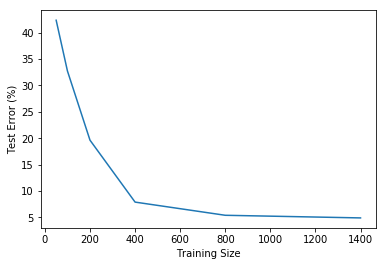

In [13]:
plt.plot(train_sizes,errors*100);
plt.xlabel('Training Size');
plt.ylabel('Test Error (%)');

In [14]:
import svm

In [15]:
errors_svm = np.ones(train_sizes.shape)
testMatrix, tokenlist, testCategory = svm.svm_readMatrix('./data/MATRIX.TEST')
for i,train_size in enumerate(train_sizes):
    trainMatrix, tokenlist, trainCategory = svm.svm_readMatrix('./data/MATRIX.TRAIN.'+str(train_size))
    state = svm.svm_train(trainMatrix, trainCategory)
    output = svm.svm_test(testMatrix, state)
    errors_svm[i] = svm.svm_evaluate(output, testCategory)

Error: 0.0163
Error: 0.0200
Error: 0.0037
Error: 0.0025
Error: 0.0000
Error: 0.0000


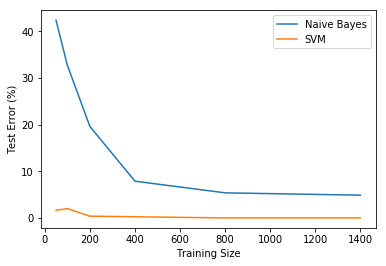

In [16]:
plt.plot(train_sizes,errors*100, label="Naive Bayes")
plt.plot(train_sizes,errors_svm*100, label="SVM")
plt.xlabel('Training Size');
plt.ylabel('Test Error (%)');
plt.legend(loc='upper right');